# Quantum Ensemble for Classification

## Antonio Macaluso



#### Department of Computer Science and Engineering, University of Bologna


#### preprint arXiv:2007.01028

<link rel="stylesheet" href=reveal.js/css/theme/sky.css" id="theme>


## Contribution

* A novel quantum algorithm to perform  ensemble classification 

* Superposition and Entanglement to generate a large number of different models

* Large ensembles feasible with relatively small circuits

* Experiments using qiskit

# Classical Ensemble Learning

## Supervised Machine Learning as Aggregator of Functions

Standard formulation for supervised ML: 

\begin{align}
            y = f(x; \Theta) +  \epsilon.
\end{align}

where $x \in \mathbb{R}^p$ and $y$ is the target variable


<center><img src="IMG/supervised.png" style="width: 600px;"/></center>

Objectives: 
* Useful approximation $\hat{f}(x; \cdot)$ 
  
* Optimal set of parameters $\Theta$

Alternative formulation:
\begin{align}
            \hat{f}(x;\beta, \theta) & = \sum_{i=1}^{B} \beta_i \hspace{0.2em} g(x;\theta_i) %= E_{\beta,\theta}[g(x; \cdot)]
\end{align}

where  $g(x; \cdot)$ is the base model and $\theta = \{ \theta_i\}_{i=1, \dots, B}$ and $\beta = \{ \beta_i\}_{i=1, \dots, B}$

## Ensemble Learning (Bagging)

+ $g(x, \cdot)$ is a ML model (under/over-fitting)


+ Fit the same model under different and independent training conditions 


+ Necessary and sufficient conditions: the base models **accurate** and **diverse**


Ensemble prediction:
\begin{align}
    f_{\text{ens}}(x) = \frac{1}{B}\sum_{i=1}^B \beta_i \hspace{0.2em} g(x; \theta_i)
\end{align}

where $g(x;\cdot)$ is the base model
        
Approaches: *Bagging, Boosting, Randomisation, Stacking*



## Example of Bagging: Random Forest

Bagging averages the predictions over a collection of bootstrap samples 

Random Forest uses a decision tree as based model

\begin{align}
            \hat{f}^B_{\text{rf}}(x) = \frac{1}{B} \sum_{i=1}^B  g(x; \theta_i) 
            = 
            \frac{1}{B} \sum_{i=1}^B \left[ \sum_{m=1}^{M} c^{(i)}_{m} \boldsymbol{I}_{\left(x\in R^{(i)}_m \right)}\right]
\end{align}

$\beta_i = \frac{1}{B}$ for $i=1, \dots, B$

$\theta_i$ characterises the $b$th tree in terms of split variables, cutpoints, terminal-node values 

<br></br>

*Friedman Jerome, Trevor Hastie, and Robert Tibshirani. The elements of statistical learning. Vol. 1. No. 10. New York: Springer series in statistics, 2001*

## Time Complexity of Classical Ensemble (Bagging)
Classical Ensemble scaling: 

\begin{align*}
            \underbrace{\mathcal{O}\left(B \times N^{a}p^{b}\right)}_\text{Training} + \underbrace{\mathcal{O}(Bp)}_\text{Testing} \qquad a, b \geq 1,
        \end{align*}

where $N$ is the number of training points and $p$ is the number of features


- Linearity in $B$ (ensemble size)
        
- Multiplicative cost of the classifier



$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[1]{\left\langle{#1}\right\rangle}$$

# Quantum Algorithm for Ensemble Learning

## Quantum Computing Properties
Superposition 
+ $n$ qubits $\xrightarrow{}$ $2^n$ states $\implies$ $n+1$ qubits $\xrightarrow{}$ $2^{n+1}$ states
+ single model/prediction $\rightarrow$ single quantum state

Entanglement
+ Each base model $g(x; \cdot)$ is strictly associated to a single weight

Interference
+ Train and Test "interact" each other to compute test prediction

## Quantum Ensemble: requirements

- Quantum gate for sampling: &emsp;  &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; $\ket{x,y} \xrightarrow{V_b}\ket{x_b,y_b}$     

- Quantum classifier $F$ (working via interference): &emsp;  $\ket{x_b,y_b}\ket{\tilde{x}}\ket{0}\xrightarrow{F} \ket{x_b,y_b}\ket{\tilde{x}}\ket{f_b}$

Input:
- $d$-qubits $control$ register
- $data$ register encodes the training set
- $test$ register encodes the test set

Output: the average of $B=2^d$ different predictions of the same classifier

## Quantum Ensemble using Bagging strategy

+ **(Step 1) State Preparation**

+ **(Step 2) Sampling in Superposition** 

+ **(Step 3) Learning via Interference**

+ **(Step 4) Measurement**

## Step 1: State Preparation
 * The training set is encoded into the $data$ quantum register
 
 * The $control$ register is initialised into uniform superposition
 
\begin{align}
            \ket{\Phi_0} & = \big(W \otimes S_{(x,y)}\big)\overset{d}{\underset{j=1}{\otimes}} \ket{0} \otimes \ket{0} \nonumber \\ 
  & = \overset{d}{\underset{j=1}{\otimes}} \left(\frac{\ket{0}+\ket{1}}{\sqrt{2}}\right) \otimes \ket{x,y} =  \frac{1}{\sqrt{2^d}}\sum_{b=1}^{2^d} \ket{b} \otimes \ket{x,y},
        \end{align}
        
$S_{(x,y)}$ is the unitary that encodes data into a quantum state 

$W=H^{\otimes d}$ is the Walsh-Hadamard gate

## Step 2: Sampling in Superposition

$2^d$ different transformations (*quantum trajectories*) of the input in superposition

Entanglement between $data$ and $control$ registers
\begin{align}
        \ket{\Phi_{d}}
        = & \frac{1}{\sqrt{2^d}} \sum_{b = 1}^{2^{d}} \ket{b} V_b\ket{x,y} = \frac{1}{\sqrt{2^d}} \sum_{b = 1}^{2^{d}} \ket{b}\ket{x_b,y_b}
\end{align}

Each $V_b$ represents a single "quantum trajectory"


\begin{equation}\label{eq:single_subsample}
  \ket{x,y} \xrightarrow{V_{b}} \ket{x_b, y_b} %\text{where} \quad U_{t_1}U_{t_2}\dots U_{t_q} = V_t
\end{equation}


$V_b$ transforms the original training set to obtain a random sub-sample of it


## Step 3: Learning via Interference

The *test* register is initialised to encode the test set, considering also a set of qubits to store the final predictions ($target$ sub-register)
\begin{align}
    (S_{\tilde{x}} \otimes \mathbb{1}) \ket{0}\ket{0} =\ket{\tilde{x}}\ket{0}
\end{align}

The $data$ and $test$ registers interact via interference to compute the target variable:
\begin{align}\label{eq:classification via interference}
\ket{\Phi_{f}} & = \Big(\mathbb{1}^{\otimes d} \otimes F \Big) \ket{\Phi_d} = (\mathbb{1}^{\otimes d} \otimes F )\Bigg[\frac{1}{\sqrt{2^d}}\sum_{b=1}^{2^d} \ket{b} \ket{x_b, y_b}\Bigg] \otimes
                        \ket{\tilde{x}}
                        \ket{0}  \nonumber \\ 
                        & =  \frac{1}{\sqrt{2^d}}\sum_{b=1}^{2^d} \ket{b} \ket{x_b, y_b} \ket{\tilde{x}}\ket{f_b} 
            %CV_{t}\ket{\psi} = CV_{t}\ket{x, y}\ket{0} \ket{x^{(\text{test})}, 0} = C \ket{x, y}\ket{x_t, x_y} \ket{x^{(\text{test})}, 0} = \ket{x, y}\ket{x_t, x_t} \ket{x^{(\text{test})}, \tilde{y}} %= \ket{x, y, D_t, x^{(\text{test})}, f(x^{(\text{test})}|x_t,y_t)} 
        \end{align}

where $\tilde{y} = f_{b}$ is computed through the quantum gate $F$

A single execution of $F$ allows propagating the use of the classifier to all $2^d$ sub-samples

## Step 4: Measurement

$\newcommand{\braket}[1]{\left\langle{#1}\right\rangle}$

The expectation $measurement$ on the target qubit provides a sum of expectation values:

\begin{align}
    \left\langle M \right\rangle & =  \braket{\Phi_f|\mathbb{1}^{\otimes d} \otimes \mathbb{1} \otimes \mathbb{1} \otimes M|\Phi_f} \nonumber \\
    & =  
    \frac{1}{2^d}\sum_{b=1}^{2^d}\braket{b|b} \otimes  \braket{(x_b,y_b)|(x_b,y_b)} \otimes\braket{\tilde{x}|\tilde{x}} \otimes\braket{f_b|M|f_b}  \nonumber \\
    & =  \frac{1}{2^d}\sum_{b=1}^{2^d}\left\langle M_b \right\rangle = \frac{1}{B} \sum_{b=1}^B \hat{f}_b = \hat{f}_{bag}(\tilde{x}|x,y)
\end{align}
E.g. 

$$f_{bag} = \sqrt{a_0}\ket{0}+\sqrt{a_1}\ket{1} $$

# Quantum Circuit

## Quantum Circuit for Ensemble

<br></br>

<center><img src="IMG/rsz_circuit.jpg" width="120%" height="120%"/></center>

The generic $i$-th step involves the following transformations:

\begin{align}
        \ket{\Phi_{i,1}} = \frac{1}{\sqrt{2}}\Big(\ket{0}\ket{x,y} + \ket{1} U_{(i,1)}\ket{x,y} \Big)
\end{align}


\begin{align}
    \ket{\Phi_{i,2}} = & ( X \otimes \mathbb{1}) \ket{\Phi_{i,1}}
    = \frac{1}{\sqrt{2}}\Big(\ket{1}\ket{x,y} + \ket{0} U_{(i,1)}\ket{x,y} \Big)
\end{align}


\begin{align}
    \ket{\Phi_{i}}= \frac{1}{\sqrt{2}}\Big(\ket{1}U_{(i,2)}\ket{x,y} + \ket{0} U_{(i,1)}\ket{x,y} \Big)
    \end{align}

## Sampling in superposition steps
The output of the State preparation is the following: 
&emsp; &emsp; $\ket{\Phi_0} = \overset{d}{\underset{i=1}{\otimes}} \left(\frac{\ket{0}+\ket{1}}{\sqrt{2}}\right) \otimes \ket{x,y}$

### Sampling in superposition steps ($1st$ step)

\begin{align}
    \ket{\Phi_{1}} = \overset{d-1}{\underset{i=1}{\otimes}} \left(\frac{\ket{0}+\ket{1}}{\sqrt{2}}\right) \otimes \frac{1}{\sqrt{2}}\Big(\ket{1}U_{(1,2)}\ket{x,y} + \ket{0} U_{(1,1)}\ket{x,y} \Big)    \end{align}

### Sampling in superposition steps ($2nd$ step)

\begin{align}
    \ket{\Phi_{2}}
            =  \overset{d-2}{\underset{i=1}{\otimes}} \left(\frac{\ket{0}+\ket{1}}{\sqrt{2}}\right) \otimes \frac{1}{2}\Big[
             \hspace{.2em} &\ket{00} U_{(2,1)}U_{(1,1)}\ket{x,y} +    
            %\nonumber \\ + & 
            \ket{01} U_{(2,1)}U_{(1,2)}\ket{x,y} +
            \nonumber \\ + & 
            \ket{10} U_{(2,2)}U_{(1,1)}\ket{x,y} +
            %\nonumber \\ + & 
            \ket{11} U_{(2,2)}U_{(1,2)}\ket{x,y}
                     \Big]  \nonumber \\
             \hspace{-10.75em} = \frac{1}{\sqrt{4}} \sum_{b=1}^{4} \ket{b} V_b\ket{x,y}
        \end{align}
        
where each $V_b$ is the product of $2$ unitaries $U_{(i,j)}$ for $j=1,2$ and $i=1,2$ 

### Sampling in Superposition ($3rd$ step)

\begin{align}
    \ket{\Phi_{3}}
    =  \overset{d-3}{\underset{i=1}{\otimes}} \left(\frac{\ket{0}+\ket{1}}{\sqrt{2}}\right) \otimes \frac{1}{\sqrt{8}}\Big[ 
    & \ket{000} U_{(3,1)}U_{(2,1)}U_{(1,1)}\ket{x,y} + \ket{001}U_{(3,1)}U_{(2,1)}U_{(1,2)}\ket{x,y}    
    \nonumber \\ + & 
     \ket{010} U_{(3,1)}U_{(2,2)}U_{(1,1)}\ket{x,y} + \ket{011}U_{(3,1)}U_{(2,2)}U_{(1,2)}\ket{x,y}    
    \nonumber \\ + & 
    \ket{100} U_{(3,2)}U_{(2,1)}U_{(1,1)}\ket{x,y} + 
    \ket{101} U_{(3,2)}U_{(2,1)}U_{(1,2)}\ket{x,y}    
    \nonumber \\ + & 
    \ket{110} U_{(3,2)}U_{(2,2)}U_{(1,1)}\ket{x,y} + \ket{111}U_{(3,2)}U_{(2,2)}U_{(1,2)}\ket{x,y}
    \Big] \nonumber \\
 & \hspace{-11.5em} = \frac{1}{\sqrt{2^3}} \sum_{b=1}^{8} \ket{b} V_b\ket{x,y}
\end{align}

where each $V_b$ is the product of $2$ unitaries $U_{(i,j)}$ for $j=1,2$ and $i=1,2,3$ 


### Sampling in superposition after d steps:


\begin{align}
        \ket{\Phi_{d}}
        & = \frac{1}{\sqrt{2^d}} \sum_{b = 1}^{2^{d}} \ket{b} V_b\ket{x,y} = \frac{1}{\sqrt{2^d}} \sum_{b = 1}^{2^{d}} \ket{b}\ket{x_b,y_b}
\end{align}

where each $V_b$ is the product of $d$ unitaries $U_{(i,j)}$ for $i=1, \cdots, d$ and $j=1,2$.



**$2^d$ different transformations** (*quantum trajectories*) of the input in superposition in only **$d$ steps**



## Time Complexity

Classical Ensemble scaling: 

\begin{align*}
            \underbrace{\mathcal{O}\left(B \times N^{a}p^{b}\right)}_\text{Training} + \underbrace{\mathcal{O}(Bp)}_\text{Testing} \qquad a, b \geq 1,
\end{align*}

Quantum Ensemble scaling: 
       
\begin{align*}
         \mathcal{O}(\underbrace{d \times 2 cost({CU_{(i,j)}})}_\text{Sampling in Sup.} + \underbrace{cost(F)}_\text{Learning} )
          %\Big) 
\end{align*}

$B =2^d$ is the ensemble size, $N$ is the number of obs., and $p$ is the number of features
        
Additive cost of the classifier (instead of multiplicative)


## Aggregation Strategy

Majority voting vs Simple averaging

\begin{align}
    f_{\text{avg}}^{(i)}(x) = \frac{1}{B}\sum_{b=1}^B f_b^{(i)}(x),
\end{align}
        
$B$ is the ensemble size and $f_b^{(i)}(x)$ is the probability for $x$ to be classified in the $i$-th class provided by the $b$-th classifier

Performance:

\begin{align}\label{perf_ens}
            E_{\text{ens}} = \frac{1+\rho(B-1)}{B}E_{\text{model}}
\end{align}
        where $E_{\text{model}}$ is the expected error of the single models and  $\rho$ is the average correlation among their errors
 


## Theoretical Performance

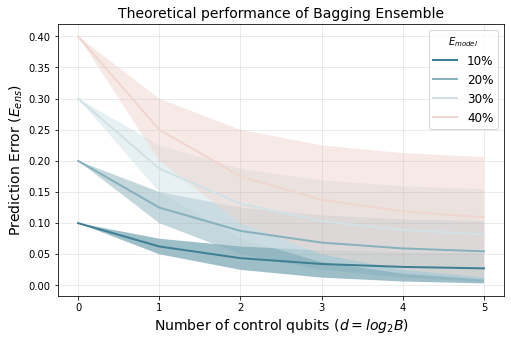

In [3]:
import sys
sys.path.insert(1, '../')
from Utils import *
# parameters
d = np.arange(6) # Number of control qubits
B = 2**d # Number of models: ensemble size
errs = np.array([0.1, 0.2, 0.3, 0.4]) # base model error
ro = [0.00, 0.25, 0.5] # correlation amontg errors

colors = sns.diverging_palette(220, 20, n=6)

# create figure
fig, ax = plt.subplots(1, figsize=(8,5))

#for each possible ensemble size
for i in np.arange(len(errs)):
    err = errs[i]
    color = colors[i]
    mean = ((1+ro[1]*(B-1))/B)*err
    lower = mean - ((1+ro[0]*(B-1))/B)*err
    upper = ((1 + ro[2] * (B - 1)) / B) * err - mean
    ax.plot(d, mean, lw=2, label = str(int(err*100))+'%', color=color)
    ax.fill_between(d, mean + upper, mean - lower, facecolor=color, alpha=0.5)

# title
ax.set_title('Theoretical performance of Bagging Ensemble', size=14).set_position([.5, 1.05])
# legend
ax.legend(loc='upper right', title = '$E_{model}$', prop=dict(size=12))
# label of x-axis
ax.set_xlabel(r'Number of control qubits $(d=log_2B)$', size=14)
## label of x-axis
ax.set_ylabel('Prediction Error ($E_{ens}$)', size=14)
# set grid
ax.grid(alpha=.3)

## Boosting and Randomisation

Quantum Boosting:
    \begin{align} \label{eq:quantum_boosting}
            \ket{\Phi_{f}} 
            = \frac{1}{\sqrt{2^d}}\sum_{b=1}^{2^d} \alpha_b \ket{b} \ket{f_b}
        \end{align}
        
where the contribution of $f_b$ to the ensemble is weighted by $\alpha_b$

Quantum Randomisation:

\begin{align}
    \ket{\Phi_{f}} 
    =\frac{1}{\sqrt{2^d}}\sum_{b=1}^{2^d}\ket{b}  G_b  \ket{x,y}\ket{\tilde{x}}\ket{0} = \frac{1}{\sqrt{2^d}}\sum_{b=1}^{2^d} \ket{b} \ket{x,y}\ket{\tilde{x}}\ket{f_b}
\end{align}

where $G_b=V_b F$ is the quantum classifier



## (Theoretical) Advantages and Limitations


+ <p>$2^d$ different transformations of the input in $d$ steps: exponential speed-up <span style="color:green">(+)</span></p>

+ Quantum parallelism allows propagation of $F$ to all quantum trajectories <span style="color:green">(+)</span></p>
         
+ Independence from the encoding strategy chosen for data <span style="color:green">(+)</span></p>
         
+ Measurement is limited to a subset of qubits <span style="color:green">(+)</span></p> 
         
<br></br>

- Evaluation of the single functions implies exponential cost <span style="color:red">(-)</span></p>
         
- Additional cost of state preparation <span style="color:red">(-)</span></p>